# Computing the Centerbias

This notebooks extracts the centerbias from the MIT1003 dataset for use in DeepGaze II and ICF. Whenever you have better knowledge of the centerbias of your dataset, you should use it to improve the predictions.

In [1]:
%matplotlib inline

In [4]:
import numpy as np

import pysaliency
import pysaliency.plotting
from pysaliency.baseline_utils import BaselineModel

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
mit1003_stimuli, mit1003_fixations = pysaliency.get_mit1003(location='test_datasets_py3')

In [6]:
bandwidth = 0.0217
regularization = 2.0e-13
baseline = BaselineModel(mit1003_stimuli, mit1003_fixations,bandwidth=bandwidth, eps=regularization)

100%|██████████| 1003/1003 [00:02<00:00, 459.57it/s]


In [7]:
image = np.random.randn(1024, 1024)
log_density = baseline.log_density(image)

(<matplotlib.image.AxesImage at 0x7f30bc00a080>,
 <matplotlib.contour.QuadContourSet at 0x7f30b97851d0>)

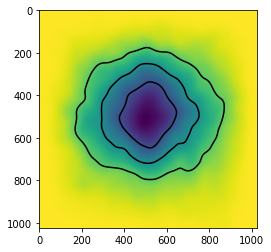

In [8]:
pysaliency.plotting.visualize_distribution(log_density)

In [10]:
np.save('centerbias.npy', log_density)